In [237]:
import numpy as np
import pprint
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 16})  # enlarge matplotlib fonts

In [238]:
# Create A matrices
A_matrices = []
b_vectors = []
for k in range(1,6):
    A_k = np.array([[0 for _ in range(10)] for _ in range(10)])
    for i in range(1,11):
        for j in range(1,11):
            if i < j:
                A_k[i-1][j-1] = np.exp(i/j) * np.cos(i*j) * np.sin(k)
            elif i > j:
                A_k[i-1][j-1] = np.exp(j/i) * np.cos(j*i) * np.sin(k)
    for i in range(1,11):
        A_k[i-1][i-1] = (i/10)*np.abs(np.sin(k)) + sum([np.abs(A_k[i-1][j-1]) if i != j else 0 for j in range(1,11)])
    A_matrices.append(A_k)
    
    b_k = np.array([0 for _ in range(10)])
    for i in range(1,11):
        b_k[i-1] = np.exp(i/k) * np.sin(i*k)
    b_vectors.append(b_k)

In [239]:
def eval_f(x,k):
    return np.inner(x, A_matrices[k].dot(x)) - np.inner(b_vectors[k],x)

In [240]:
def f(x):
    return max([eval_f(x,k) for k in range(5)])

In [241]:
x1 = np.array([1] * 10)
f(x1)

5287

In [242]:
def eval_subgradient(x,k):
    return 2*A_matrices[k].dot(x) - b_vectors[k]

In [243]:
def get_subgradient(x):
    max_k = 0
    for k in range(1,5):
        if eval_f(x,k) > eval_f(x,max_k):
            max_k = k
    
    return A_matrices[max_k].dot(x) - b_vectors[max_k]

In [244]:
get_subgradient(x1)

array([   -2,    -4,     2,    45,   144,   112,  -714, -2945, -3337,
       11986])

In [245]:
f(2*x1) - (f(x1) + np.inner(get_subgradient(x1), x1))

56

In [246]:
T = 10000
C = 0.09 #3.33

iterates = [x1]
iterate_values = [f(x1)]
min_iterate = x1
min_iterate_values = [f(x1)]

for t in range(2,T+1):
    learning_rate = C/np.sqrt(t-1)
    subg = get_subgradient(iterates[-1])
    subg_norm = np.linalg.norm(subg, 2)
    iterate = iterates[-1] - learning_rate * subg / subg_norm
    
    if f(iterate) < f(min_iterate):
        min_iterate = iterate
        
    iterates.append(iterate)
    iterate_values.append(f(iterate))
    min_iterate_values.append(f(min_iterate))

f(min_iterate) 

-0.6822217640385775

-0.6822217640385775


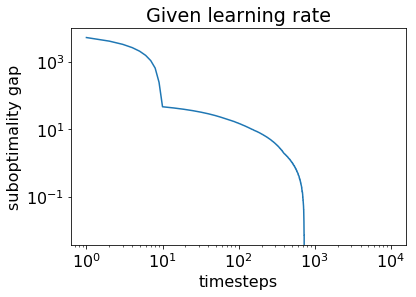

In [247]:
ts = [i+1 for i in range(T)]
print(f(min_iterate))
plt.loglog(ts, [a-0.6822217640385775 for a in min_iterate_values])
    
plt.title("Given learning rate")

plt.xlabel("timesteps")
plt.ylabel("suboptimality gap")

plt.show()

In [248]:
2*A_matrices[0].dot(min_iterate) - b_vectors[0]

array([-3.33482530e+00, -7.15170953e+00,  1.56204336e+00,  4.60568297e+01,
        1.41886721e+02,  1.04088145e+02, -7.17364159e+02, -2.94055694e+03,
       -3.33499380e+03,  1.19858986e+04])

In [249]:
np.linalg.eigh(A_matrices[0])

(array([0.56866569, 0.65222705, 1.76895156, 2.14117705, 2.8694168 ,
        3.45020499, 4.58131106, 6.02590403, 6.29715167, 7.6449901 ]),
 array([[-0.74323189,  0.51727724, -0.00413651, -0.34629272,  0.10055501,
          0.13738762,  0.14494   , -0.02860397,  0.09324388, -0.02424809],
        [ 0.05119353, -0.14150837,  0.62729787, -0.35380929,  0.49357045,
         -0.00826762, -0.13331032, -0.08147142, -0.43610462, -0.01985852],
        [-0.32058141,  0.17989503,  0.00318078,  0.39518131, -0.18797923,
         -0.33662784, -0.51907523,  0.14376082, -0.49392698,  0.1611283 ],
        [ 0.29316973,  0.15690128, -0.16878211, -0.68145381, -0.32901697,
          0.01481985, -0.34817325,  0.39189791, -0.05056674,  0.1035829 ],
        [-0.01242685,  0.1003634 ,  0.46974873,  0.04560171, -0.14852769,
         -0.31591169, -0.3246794 ,  0.04778484,  0.55470994, -0.47933859],
        [-0.26458996, -0.43777148, -0.02078613, -0.25987912, -0.29687036,
         -0.57149462,  0.43818679,  0.09188

In [250]:
eig = np.array([x[4] for x in np.linalg.eig(A_matrices[0])[1]])
eig

array([-0.74323189,  0.05119353, -0.32058141,  0.29316973, -0.01242685,
       -0.26458996,  0.20852625, -0.18368596, -0.27014062, -0.18948005])

In [251]:
2*A_matrices[0].dot(eig) 

array([-0.84530095,  0.05822401, -0.3646073 ,  0.33343113, -0.01413345,
       -0.30092646,  0.23716344, -0.20891181, -0.30723941, -0.21550161])

In [252]:
A_matrices[0].dot(eig)

array([-0.42265047,  0.02911201, -0.18230365,  0.16671557, -0.00706673,
       -0.15046323,  0.11858172, -0.10445591, -0.1536197 , -0.1077508 ])

In [253]:
#Polyak step size
T = 10000

iterates = [x1]
iterate_values = [f(x1)]
min_iterate = x1
min_iterate_values = [f(x1)]

num = f(iterate) + 0.6822217640385775   #3.33

for t in range(2,T+1):
    subg = get_subgradient(iterates[-1])
    subg_norm = np.linalg.norm(subg, 2)
    learning_rate = num/subg_norm
    
    iterate = iterates[-1] - learning_rate * subg / subg_norm
    
    if f(iterate) < f(min_iterate):
        min_iterate = iterate
        
    iterates.append(iterate)
    iterate_values.append(f(iterate))
    min_iterate_values.append(f(min_iterate))

f(min_iterate) 

1787.4242459581778

1787.4242459581778


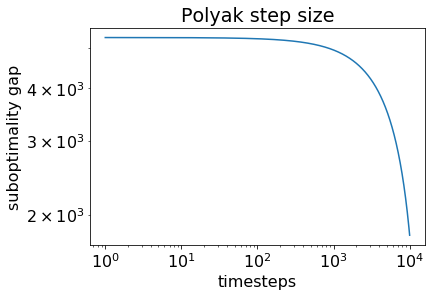

In [254]:
ts = [i+1 for i in range(T)]
print(f(min_iterate))
plt.loglog(ts, [a-0.6822217640385775 for a in min_iterate_values])
    
plt.title("Polyak step size")

plt.xlabel("timesteps")
plt.ylabel("suboptimality gap")

plt.show()